In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

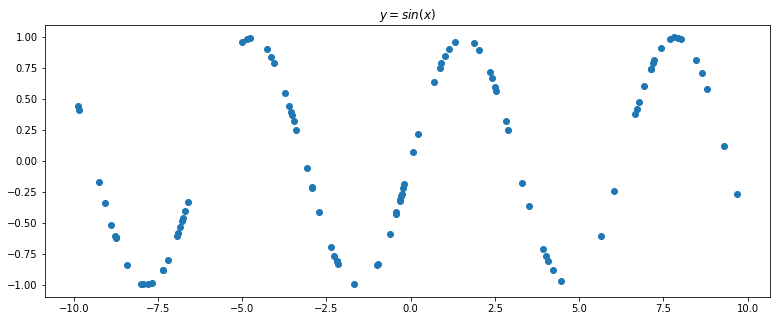

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

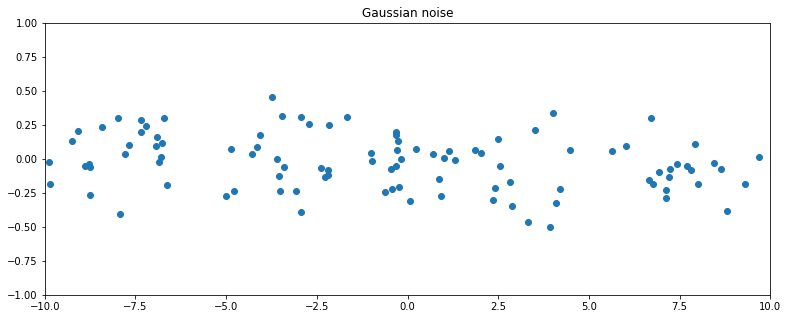

In [4]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

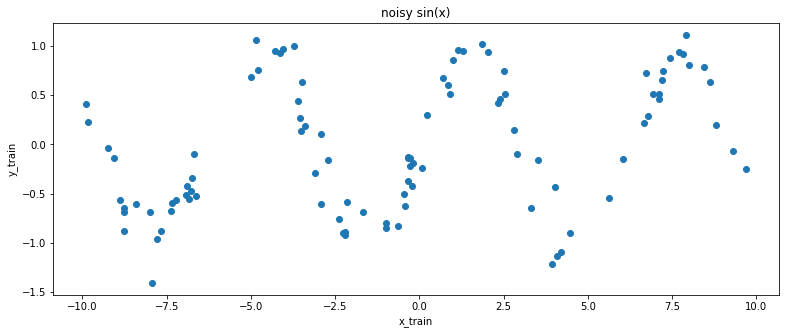

In [5]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [6]:
# приведём train dataset в правильный формат:
# кол-во строчек = кол-во элементов, колонки -> признаки (в нашем случае 1 признак)
# вектор-строку превращаем в столбец

x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [7]:
# для понимания работы unsqueeze_

tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

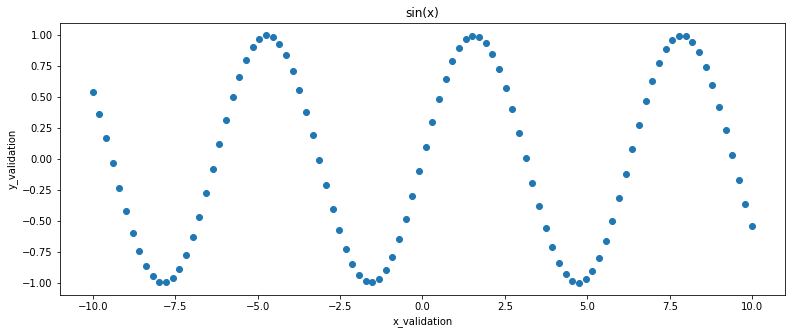

In [8]:
# в качестве валидации для простоты возьмём чистый sin

x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [9]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [36]:
# задаем архитектуру сети в классе SinNet

class SinNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons): #передаём кол-во скрытых нейронов, хранящихся в каждом слое (полагаем, что все слои одинакового размера)
        super(SinNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) #первый полносвязный слой
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):  # ф-я последовательного применения слоёв
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sin_net = SinNet(15)


# Prediction before fitting

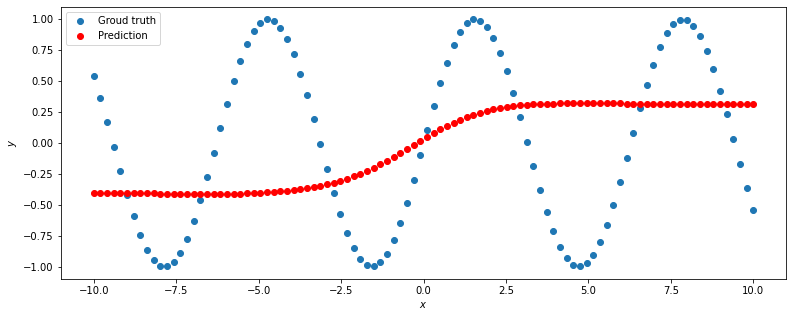

In [26]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sin_net, x_validation, y_validation)

# Optimizer

In [37]:
# передаём в optimizer параметры нейросети, которые хотим оптимизировать

optimizer = torch.optim.Adam(sin_net.parameters(), lr=0.01) 

# Loss function

In [23]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

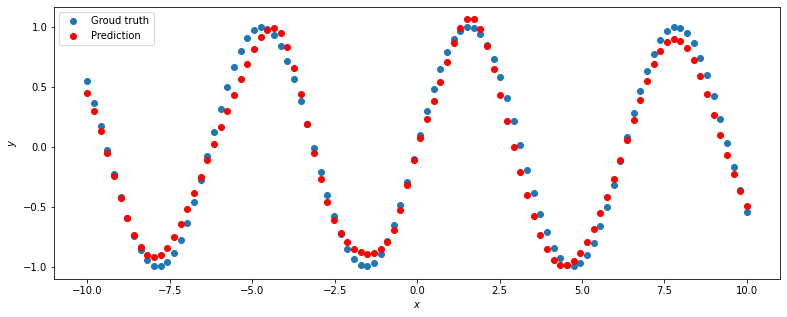

In [38]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sin_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sin_net, x_validation, y_validation)